In [ ]:
!pip install river==0.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for river: filename=river-0.7.0-cp310-cp310-linux_x86_64.whl size=2361406 sha256=887c9f2f656348ef93df5d2e48a22a45cc640a6baaa4fa0a0c2eaa8f17b2ab16
  Stored in directory: /root/.cache/pip/wheels/71/e9/7e/105173d51ebb5262f6f2dc4f6a5003ec86365255e8fd989733
Successfully built river


In [ ]:
!pip install memory-profiler

In [ ]:
!pip install optunity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for optunity: filename=Optunity-1.1.1-py3-none-any.whl size=72029 sha256=aca84881c157dff51bc8af8464042eac58cc8df0f3bacffd709d59e92c827288
  Stored in directory: /root/.cache/pip/wheels/83/98/40/b9956c3386a045f035f9edbf894edd04713db92f29fb58a225
Successfully built optunity


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from river import metrics
from river import stream
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/traffic/tfidf_embeddings.csv")
data

,00pm,10a,10th,125th,12pm,145th,14th,16th,180th,19th,...,yes,yet,york,you,youd,your,youre,youth,zone,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,2
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.184964,0.0,0.200696,0.0,0.0,0.0,0


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.55, test_size = 0.45, shuffle=False, random_state = 0)

In [ ]:
X_test

,00pm,10a,10th,125th,12pm,145th,14th,16th,180th,19th,...,years,yes,yet,york,you,youd,your,youre,youth,zone
1650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.245781,0.0,0.0,0.0
1653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.309541,0.000000,0.0,0.000000,0.0,0.0,0.0
1654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.184964,0.0,0.200696,0.0,0.0,0.0


In [ ]:
%%time
import memory_profiler as mem_profile
m1 = mem_profile.memory_usage()
print('Memory (Before): ' + str(m1[0]) + ' MB' )
classifier = RandomForestClassifier(n_estimators = 25, min_samples_leaf = 9, max_depth = 13, min_samples_split = 6, max_features = 20, criterion = 'entropy')
# classifier = joblib.load('Optimized_lightGBM.pkl')
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test,predictions)))

m2 = mem_profile.memory_usage()
print('Memory (After) : ' + str(m2[0]) + ' MB')
print('Memory Consumption : ' + str(m2[0]-m1[0]) + ' MB')

Memory (Before): 628.2578125 MB
Accuracy: 0.8592592592592593
Memory (After) : 628.75 MB
Memory Consumption : 0.4921875 MB
CPU times: user 163 ms, sys: 0 ns, total: 163 ms
Wall time: 372 ms


In [ ]:
import time
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

# a: warining threshold, b: drift threshold, win1: sliding window size, win2: adaptive window max size
def oasw_bo(params):

    a=abs(float(params['a']))
    b=abs(float(params['b']))
    win1=int(params['win1'])
    win2=int(params['win2'])

    i=0
    yt = []
    yp = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    metric = metrics.Accuracy()

    classifier = RandomForestClassifier(n_estimators = 25, min_samples_leaf = 9, max_depth = 13, min_samples_split = 6, max_features = 20, criterion = 'entropy') # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    for j in range(1650,3000):
        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric

        # Store the y_test, y_pred, and x_test
        yt.append(yi)
        yp.append(y_pred)

        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)
            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1
    score=metric.get()
    print(str(a)+" "+str(b)+" "+str(win1)+" "+str(win2)+" "+str(score)) # Output the hyperparameter values and corresponding accuracy
    return {'loss': -score, 'status': STATUS_OK }

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
space = {
    'a': hp.quniform('a', 0.75, 0.99, 0.001),
    'b': hp.quniform('b', 0.75, 0.98, 0.001),
    'win1': hp.quniform('win1', 200, 1500, 10),
    'win2': hp.quniform('win2', 200, 3000, 10),
}

t1=time.time()
best = fmin(fn=oasw_bo,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print(t2-t1)

0.809 0.8140000000000001 290 1340 0.8629629629629629
0.862 0.847 1280 350 0.857037037037037
0.757 0.797 1500 340 0.8666666666666667
0.884 0.792 1370 1610 0.8414814814814815
0.86 0.876 900 1340 0.845925925925926
0.895 0.965 1110 2770 0.8422222222222222
0.919 0.762 1250 2440 0.822962962962963
0.856 0.98 1220 1630 0.8592592592592593
0.776 0.763 700 2080 0.8696296296296296
0.835 0.85 1330 1330 0.8740740740740741
0.899 0.756 1000 380 0.8125925925925926
0.879 0.862 1190 2610 0.8762962962962964
0.963 0.798 1400 870 0.8511111111111112
0.754 0.8170000000000001 670 1380 0.8422222222222222
0.898 0.874 1380 2470 0.8696296296296296
0.961 0.9510000000000001 1130 350 0.8022222222222222
0.871 0.806 540 2260 0.8111111111111111
0.843 0.865 930 2240 0.8540740740740741
0.868 0.848 1290 1660 0.8511111111111112
0.901 0.841 1190 2750 0.8762962962962964
0.931 0.902 1490 2960 0.8762962962962964
0.935 0.912 1450 2800 0.8525925925925926
0.809 0.904 1060 1940 0.817037037037037
0.982 0.92 780 2900 0.79407407407407

In [ ]:
def oasw(a=0.99, b=0.95, win1=200, win2=1000):
    a = round(a, 3)
    b = round(b, 3)
    win1 = round(win1)
    win2 = round(win2)

    i=0
    yt = []
    yp = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    metric = metrics.Accuracy()

    classifier = RandomForestClassifier(n_estimators = 25, min_samples_leaf = 9, max_depth = 13, min_samples_split = 6, max_features = 20, criterion = 'entropy') # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    for j in range(1650,3000):

        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric

        # Store the y_test, y_pred, and x_test
        yt.append(yi)
        yp.append(y_pred)
        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)
            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1
    score=metric.get()
    print(str(a)+" "+str(b)+" "+str(win1)+" "+str(win2)+" "+str(score)) # Output the hyperparameter values and corresponding accuracy
    return score

In [ ]:
import optunity
import optunity.metrics

search = {
    'a': [0.75,0.99],
    'b': [0.75,0.98],
    'win1': [100,1500],
    'win2': [700,3000],
         }

optimal_configuration, info, _ = optunity.maximize(oasw,
                                                  solver_name='particle swarm',
                                                  num_evals=50,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

0.788 0.93 1074 2175 0.8666666666666667
0.803 0.801 112 2893 0.8674074074074074
0.923 0.916 812 1743 0.8348148148148148
0.983 0.859 1162 2318 0.8022222222222222
0.863 0.974 462 1168 0.8748148148148148
0.833 0.83 987 2606 0.84
0.953 0.945 287 1456 0.8696296296296296
0.893 0.772 637 2031 0.8222222222222222
0.773 0.887 1337 881 0.8525925925925926
0.766 0.765 855 1096 0.8555555555555555
0.822 0.963 878 1853 0.8644444444444445
0.837 0.833 308 2571 0.8392592592592593
0.89 0.948 616 1421 0.8562962962962963
0.95 0.891 966 1996 0.8311111111111111
0.832 0.979 365 1156 0.8592592592592593
0.867 0.862 791 2284 0.8637037037037038
0.92 0.974 483 1134 0.8651851851851852
0.877 0.805 441 1709 0.8792592592592593
0.807 0.92 1141 1203 0.8644444444444445
0.799 0.797 659 924 0.8674074074074074
0.856 0.93 682 1531 0.8429629629629629
0.871 0.85 504 2249 0.8333333333333334
0.856 0.916 420 1612 0.8622222222222222
0.916 0.901 770 1674 0.8644444444444445
0.865 0.947 375 1478 0.8762962962962964
0.901 0.87 595 1962 

In [ ]:
# Define OASW with a figure
def oasw_plot(a=0.99, b=0.95, win1=200, win2=1000):
    a = round(a, 3)
    b = round(b, 3)
    win1 = round(win1)
    win2 = round(win2)

    metric = metrics.Accuracy()
    metric2 = metrics.Accuracy()

    i = 0
    t = []
    yt = []
    yp = []
    m = []
    m2 = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]
    dri=[0]
    mt =0

    classifier = RandomForestClassifier(n_estimators = 25, min_samples_leaf = 9, max_depth = 13, min_samples_split = 6, max_features = 20, criterion = 'entropy') # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    classifier2 = RandomForestClassifier(n_estimators = 25, min_samples_leaf = 9, max_depth = 13, min_samples_split = 6, max_features = 20, criterion = 'entropy') # Train an offline LightGBM model as a comparison model
    classifier2.fit(X_train,y_train)

    for j in range(1650,3000):
        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric


        y_pred2= classifier2.predict(xi2.reshape(1, -1))
        metric2 = metric2.update(yi, y_pred2[0])

        # Store the y_test, y_pred, x_test, and real-time accuracy
        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        m2.append(metric2.get()*100)
        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)

            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1

    # Plot the accuracy change figure
    plt.rcParams.update({'font.size': 35})
    plt.ion()
    plt.figure(1,figsize=(24,15))
    sns.set_style("darkgrid")
    plt.clf()
    plt.plot(t,m,'-b',label='ASW+RF, Avg Accuracy: %.2f%%'%(metric.get()*100))
    plt.plot(t,m2,'red',label='Offline RF, Avg Accuracy: %.2f%%'%(metric2.get()*100))

    #Plot the drift points
    for i in range(len(dr)):
        if i!=0:
            plt.scatter(dr[i],m[dr[i]],s=200,c='r')

    plt.legend(loc='best')
    plt.ylim(10,100)
    #plt.title('NSL-KDD', fontsize=40)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy(%)')

    plt.draw()


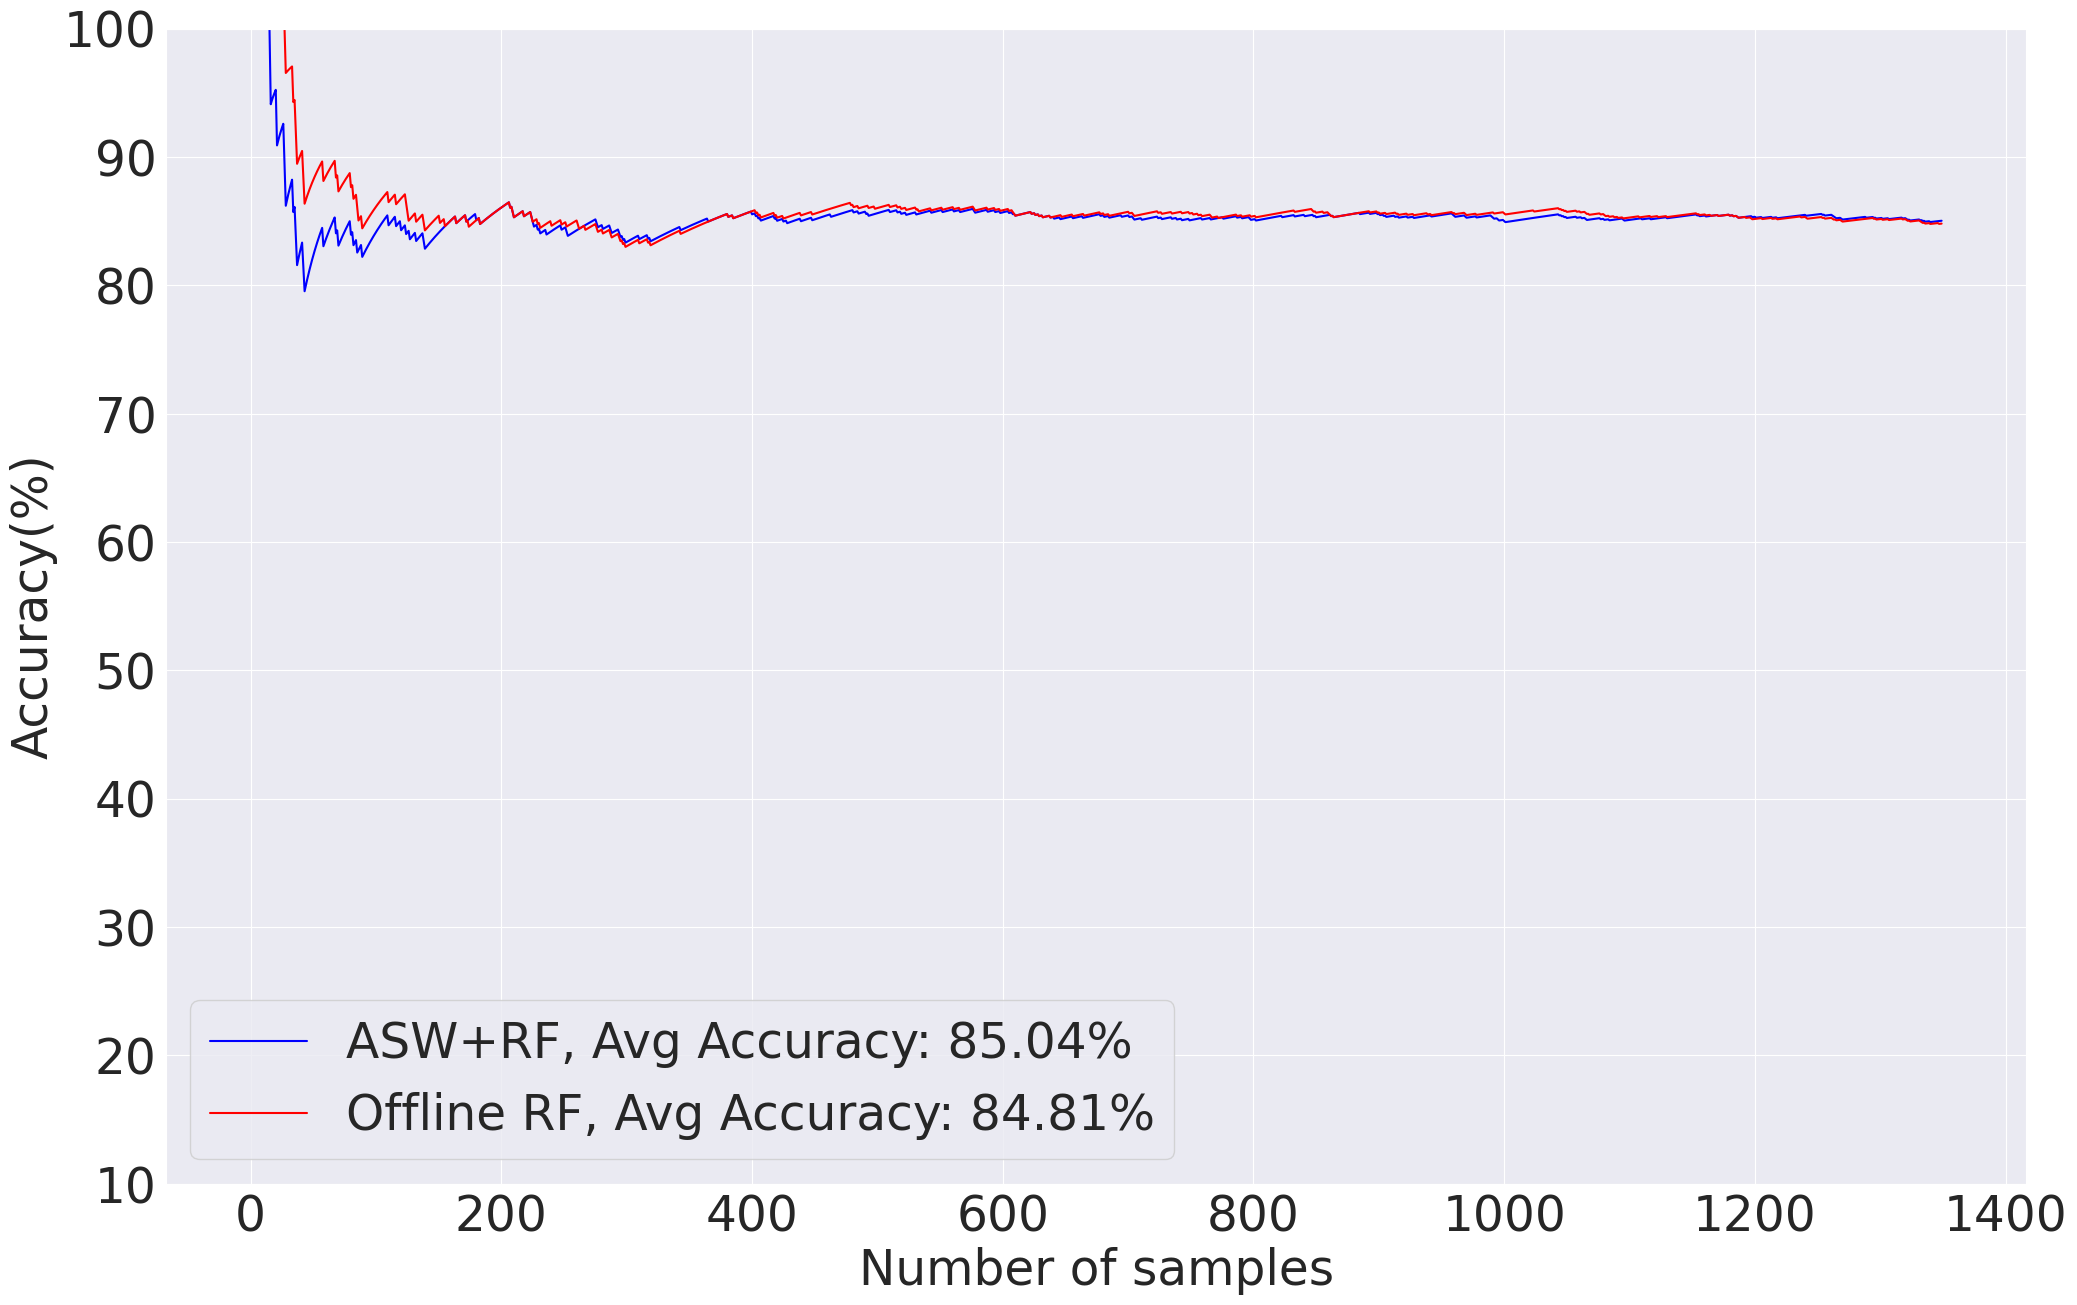

In [ ]:
oasw_plot(a= 0.8802185610277794, b= 0.9417355468749999, win1= 305.5703125, win2= 1006.9089684484435)

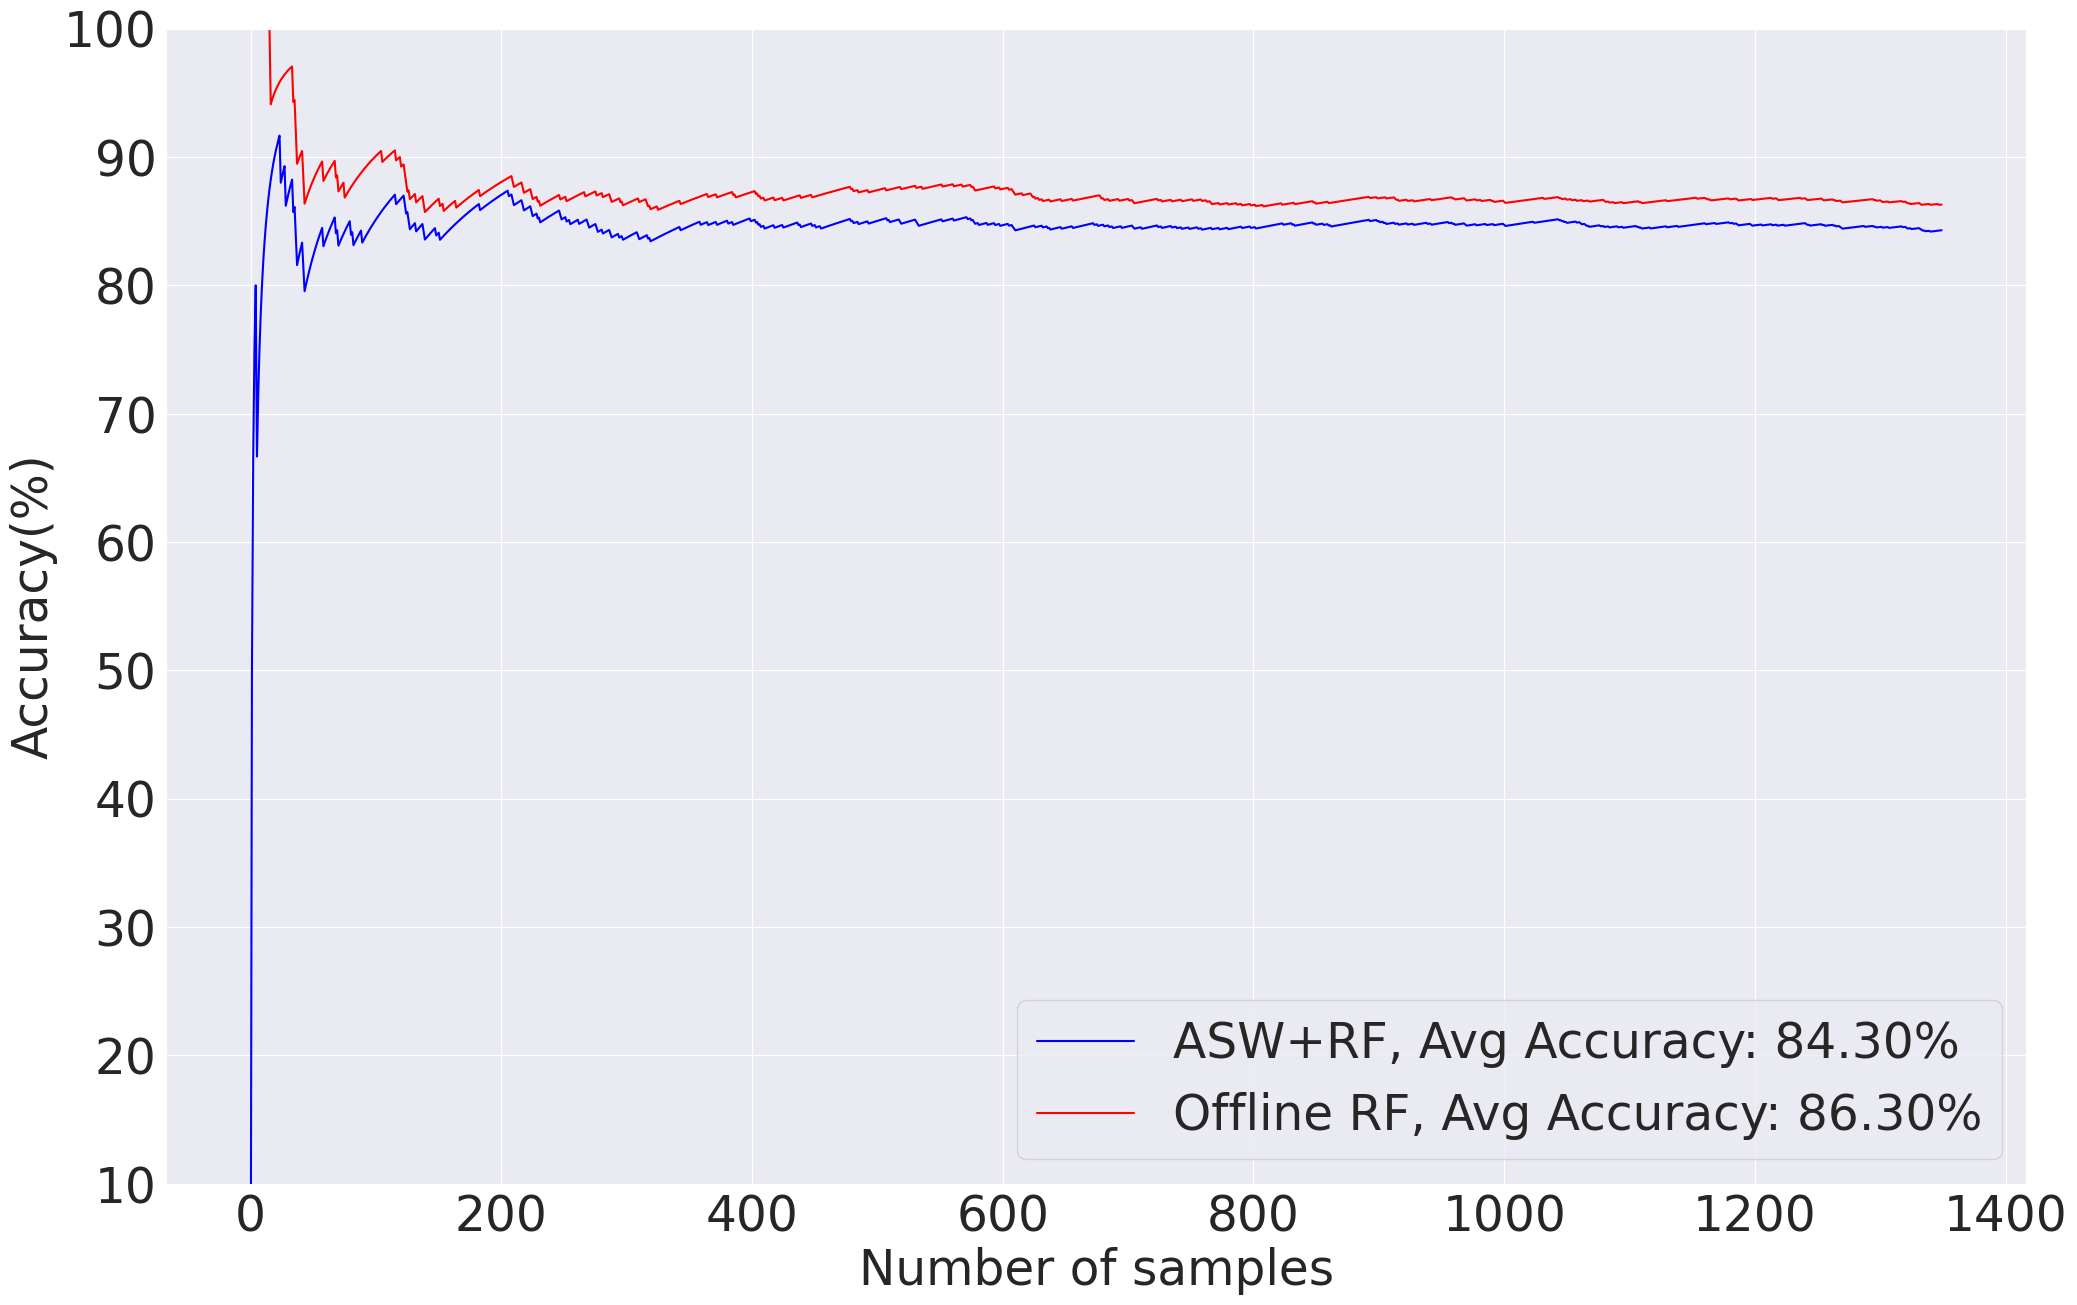

In [ ]:
oasw_plot(a=0.9540000000000001, b= 0.777, win1= 930.0, win2= 2330.0)